In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNSIT_data/", one_hot=True)
# mnist is a complex Python object

Extracting MNSIT_data/train-images-idx3-ubyte.gz
Extracting MNSIT_data/train-labels-idx1-ubyte.gz
Extracting MNSIT_data/t10k-images-idx3-ubyte.gz
Extracting MNSIT_data/t10k-labels-idx1-ubyte.gz


In [4]:
import tensorflow as tf 

In [5]:
%matplotlib inline
import  matplotlib.pyplot as plt

[[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]]


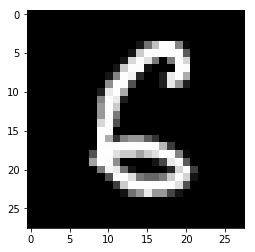

In [21]:
batch_xs, batch_ys = mnist.train.next_batch(1)
# this is a  one hot encoded vector: the index of the actual corresponding number, we see on, and all the other elements are zero
#now we will access 1 at a time image fromm 55,000 from the MNIST training set
X = batch_xs
X = X.reshape([28,28])
# images in the Mnist dta set are 28 by 28 pixels. 
# but we are only optaining a vector of 784 pixel's length, so we have to reshape it
plt.gray()
print(batch_ys)
plt.imshow(X)

In [9]:
x = tf.placeholder(tf.float32, [None, 784])
# placeholder: tense sevice in Tensorflow that data is fed in during excution time
# this is used  to add data during training, which takes place after this computation graph is constructed
# placeholders are typed and we can use either sngle or a double position
# so this placeholder will take our training vectors,
#representing the images, the 784 elements inside
W = tf.Variable(tf.zeros([784,10]))
# a variable is sth Tensorflow retrieve during training whereas the placehlder is meant to keep training data
# in additon a variable can be saved to disk during and after training for check pointing and water transfer
# we create our weight matrix W with 784 bytes on one X's
# just one for each element of X, and we do it 10 times
# since we are basically running 10 soft mix regression motors in pararell
# one for each possible digit
b = tf.Variable(tf.zeros([10]))
# finally we end up with a bias that draw one foot each soft next regression model
y = tf.nn.softmax(tf.matmul(x,W)+b)
# be aware that no computating is happening at this stage
# we are not basically hooking up the notes together to form a computing of graph
# softmax as well as Matmul expect Tensorflow variables as Polanyi does
# we are just despiting the expressive computation of graph
# whic is executed bt the Tensorflow engine in the background
#Tensorflow is not having it's own domain specific language for doing so,
#but it's relying on language bindings in different programming languages

In [11]:
y_ = tf.placeholder(tf.float32, [None,10])
# creating another placeholder for a training level spike
# These are often mentioned 10, because why? It is the one hot encoded vector labeling the image.

In [13]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
# Now we defined the cost function as cross-entropy. 
#Therefore, let me just walk you through the formula and we will see later how to implement it in TensorFlow. 
#So we take a predictive value of Y head and multiply it to the log of the desired value of Y and some of those values up. 
#So we start with the reduce mean function of TensorFlow, 
#because we are now calculating 10 individual cross-entrophy values, one for each softmax regression model. 
#Then we use Reduce Sum, to calculate the sum of the individual values of a Tensor. 
#And this Tensor is the product of the desired value, and the luck of the actual prediction.
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
#Reduction indices defines that the dimension of the Tensor that aggregation should take place. 
#Since Y is a matrix of 10 columns and N rows, 
#he N stands for a number of creating examples, the sum over the columns to obtain the value for each digit. 
#This reside has no past to an argument to reduce mean, 
#so that the overall prediction error is calculated all of the individual prediction errors for each number between zero and nine.
#Now, we use TensorFlow GradientDescentOptimizer with the learning rate of zero to five, 
# to tweak W and B with respect to the cross-entropy function. 
#So TensorFlow will take care of calculating the back propagation and gradients for this task automatically. 
#A feature called automatic differentiation, does the job for us.

In [14]:
sess = tf.InteractiveSession()
#Now we create a TensorFlow session, since we are in an interactive context within a Jupiter notebook we use the interactive session.
#A session is the way to deploy a TensorFlow execution graph, onto a specific execution context like a CPU or GPU.

In [19]:
tf.global_variables_initializer().run()
#Then we initialize all global variables, since this hasn't been done. Remember, the chest has only expressed the computation of graph. Now it's time to bring it to life. 

In [22]:
#After the variables have been initialized, it's time to create our GradientsDescent loop.
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
#So this is batch Gradienst Descent, since on each iteration, 
#we graph a hand that randomly selected examples from returning set and using the session object, 
#the ExecuteGradientDescent for those hand out examples. 
#Note that if you pass the training example as parameters to this function call, 
#in order to assign them to the previously defined placeholders. So this runs very fast.

In [23]:
#Now let's evaluate our classification performance using the test set from MNIST. 
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
#So argmax returns the index of the tensor, in this case a vector, which the maximum value. 
#This may be can transform back from one hot encoding scheme to a scalar. 

In [24]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#We use reduce mean in order to determine the amount of correctly predicted values, 
#but since correct prediction is a full in vector, we have to cast it to float in order to calculate the mean over this vector.

In [25]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
#And again, accuracy is a note in computation of graph.
#Therefore, we need to use the TensorFlow session in order to execute it. 
#Now the placeholders does become handy, because now we assign the test dataset to the graph. 
#And as expected, this timber regression model gives us 92 percent of accuracy. 

0.918
